In [1]:
import modelskill as ms

In [2]:
fn = '../tests/testdata/Oresund2D.dfsu'
mr = ms.model_result(fn, item='Surface elevation')
mr.data

Dfsu2D
number of elements: 3612
number of nodes: 2046
projection: UTM-33
items:
  0:  Surface elevation <Surface Elevation> (meter)
  1:  Total water depth <Water Depth> (meter)
  2:  U velocity <u velocity component> (meter per sec)
  3:  V velocity <v velocity component> (meter per sec)
  4:  Wind U velocity <Wind Velocity> (meter per sec)
  5:  Wind V velocity <Wind Velocity> (meter per sec)
  6:  Air pressure <Pressure2> (pascal)
time: 51 steps with dt=12000.0s
      2018-03-04 00:00:00 -- 2018-03-10 22:40:00

In [3]:
fn = '../tests/testdata/smhi_2095_klagshamn.dfs0'
o1 = ms.PointObservation(fn, x=366844.15, y=6154291.6, item=0) 
print(o1)
print(o1.n_points, o1.start_time)

PointObservation: smhi_2095_klagshamn, x=366844.15, y=6154291.6
50328 2015-01-01 01:00:00


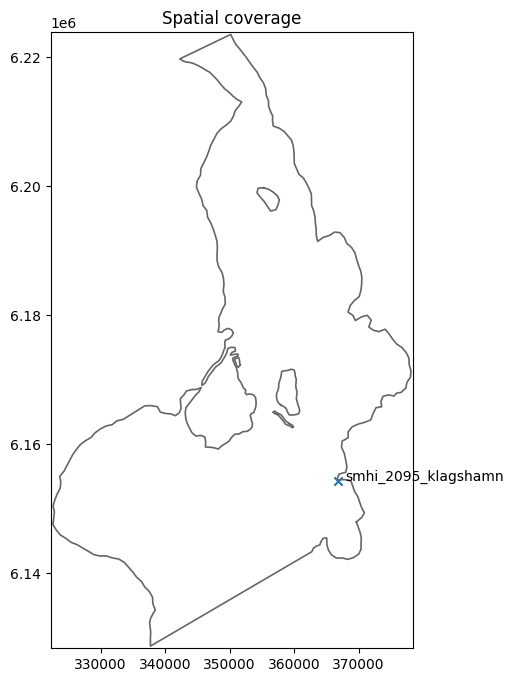

In [4]:
ms.plotting.spatial_overview(o1, mr, figsize=(8, 8));

In [5]:
cmp = ms.match(o1, mr)
cmp

<Comparer>
Quantity: Water Level [meter]
Observation: smhi_2095_klagshamn, n_points=167
 Model: Oresund2D, rmse=0.189

Most use cases will compare many observed locations to a one or more models.

In this case we only have one observed location.

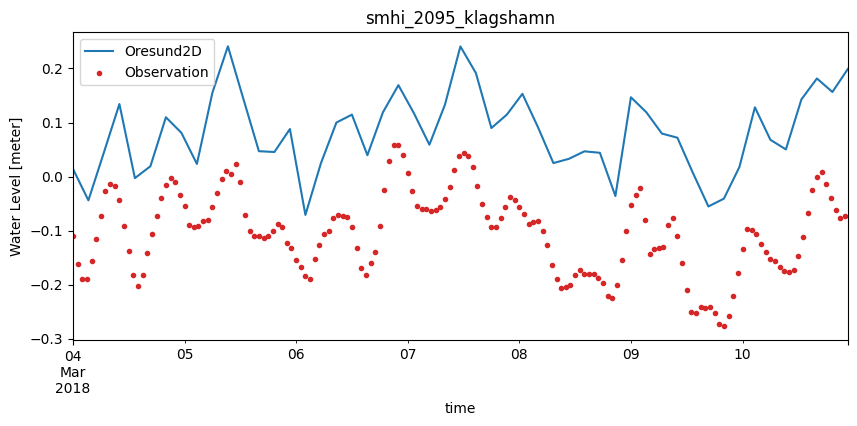

In [6]:
cmp.plot.timeseries(figsize=(10,4));

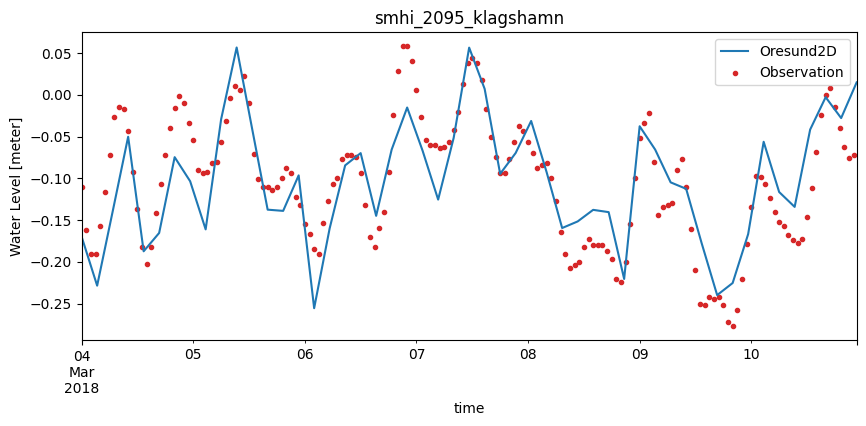

In [7]:
ub_cmp = cmp.remove_bias()
ub_cmp.plot.timeseries(figsize=(10,4));

In [8]:
ub_cmp.score("bias")

{'Oresund2D': -2.6592168254494768e-17}

In [17]:
cmp.skill().style()

,n,bias,rmse
observation,,,
smhi_2095_klagshamn,167,0.184,0.189


In [15]:
cmp.score("bias")

{'Oresund2D': 0.18441130340484135}

<Axes: title={'center': 'smhi_2095_klagshamn'}, xlabel='time', ylabel='Water Level [meter]'>

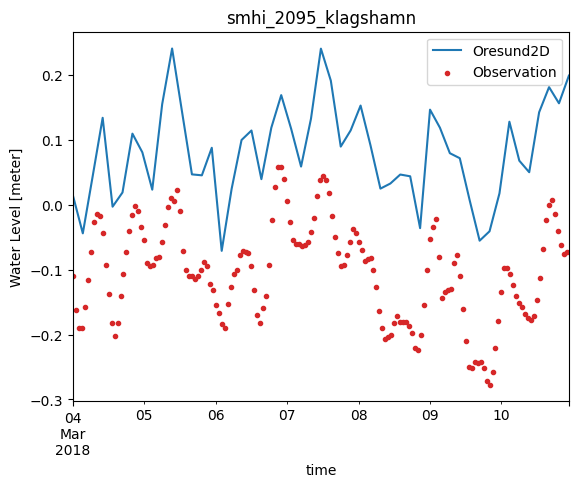

In [9]:
cmp.plot.timeseries()

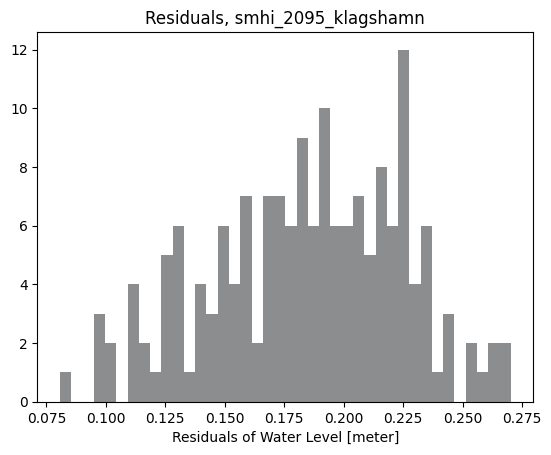

In [10]:
cmp.plot.residual_hist(bins=40);

Get skill for a commonly used set of metrics

In [11]:
cmp.skill()

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
smhi_2095_klagshamn,167,0.184411,0.188837,0.040645,0.184411,0.841135,0.376413,-5.338911


Or choose specific metrics

In [12]:
cmp.metrics = ["bias","rmse"]
cmp.skill()

,n,bias,rmse
observation,,,
smhi_2095_klagshamn,167,0.184411,0.188837


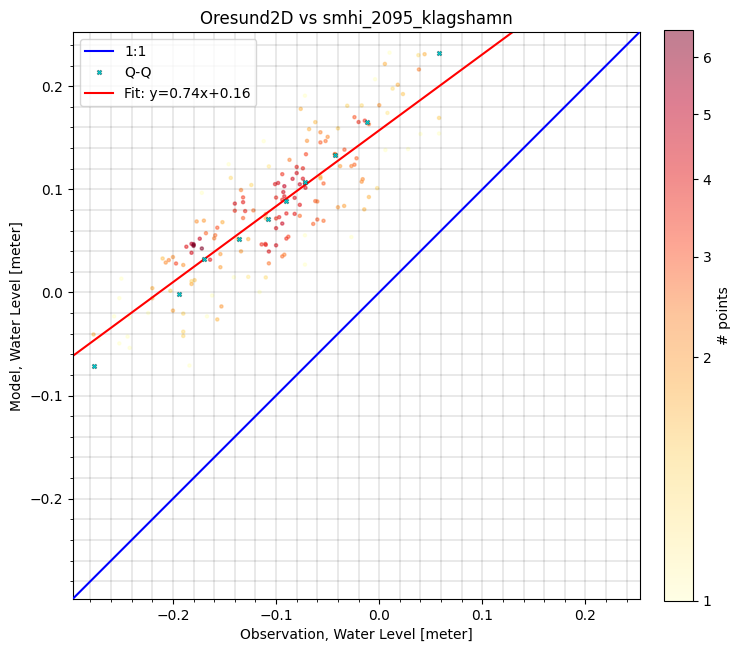

In [13]:
cmp.plot.scatter(bins=0.02, cmap='YlOrRd', show_points=True);

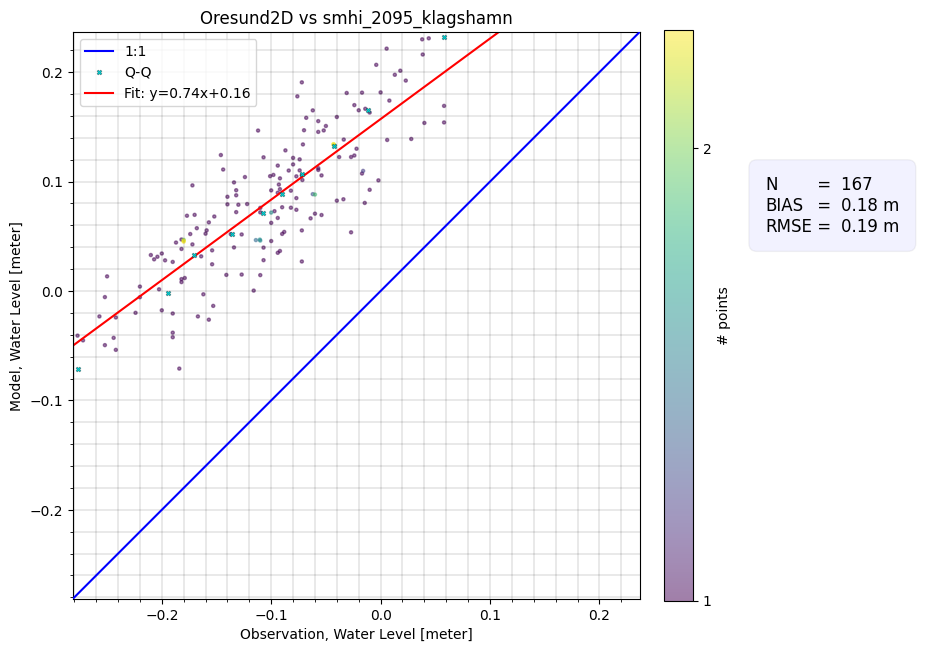

In [14]:
cmp.plot.scatter(skill_table=True, show_points=True);